In [44]:
# 1. Instalação de bibliotecas
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly


In [45]:
# 2. Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [46]:
# 3. Carregamento dos dados
df = pd.read_csv('Dados_Estatisticos (1).csv', on_bad_lines='skip', header=0, delimiter=';')
print("Colunas do dataset:", df.columns)
print(df.head())

Colunas do dataset: Index(['EMPRESA_SIGLA', 'EMPRESA_NOME', 'EMPRESA_NACIONALIDADE', 'ANO', 'MES',
       'AEROPORTO_DE_ORIGEM_SIGLA', 'AEROPORTO_DE_ORIGEM_NOME',
       'AEROPORTO_DE_ORIGEM_UF', 'AEROPORTO_DE_ORIGEM_REGIAO',
       'AEROPORTO_DE_ORIGEM_PAIS', 'AEROPORTO_DE_ORIGEM_CONTINENTE',
       'AEROPORTO_DE_DESTINO_SIGLA', 'AEROPORTO_DE_DESTINO_NOME',
       'AEROPORTO_DE_DESTINO_UF', 'AEROPORTO_DE_DESTINO_REGIAO',
       'AEROPORTO_DE_DESTINO_PAIS', 'AEROPORTO_DE_DESTINO_CONTINENTE',
       'NATUREZA', 'GRUPO_DE_VOO', 'PASSAGEIROS_PAGOS', 'PASSAGEIROS_GRATIS',
       'CARGA_PAGA_KG', 'CARGA_GRATIS_KG', 'CORREIO_KG', 'ASK', 'RPK', 'ATK',
       'RTK', 'COMBUSTIVEL_LITROS', 'DISTANCIA_VOADA_KM', 'DECOLAGENS',
       'CARGA_PAGA_KM', 'CARGA_GRATIS_KM', 'CORREIO_KM', 'ASSENTOS', 'PAYLOAD',
       'HORAS_VOADAS', 'BAGAGEM_KG'],
      dtype='object')
  EMPRESA_SIGLA                                      EMPRESA_NOME  \
0           1ED  SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S 

In [47]:
print(df.columns)

Index(['EMPRESA_SIGLA', 'EMPRESA_NOME', 'EMPRESA_NACIONALIDADE', 'ANO', 'MES',
       'AEROPORTO_DE_ORIGEM_SIGLA', 'AEROPORTO_DE_ORIGEM_NOME',
       'AEROPORTO_DE_ORIGEM_UF', 'AEROPORTO_DE_ORIGEM_REGIAO',
       'AEROPORTO_DE_ORIGEM_PAIS', 'AEROPORTO_DE_ORIGEM_CONTINENTE',
       'AEROPORTO_DE_DESTINO_SIGLA', 'AEROPORTO_DE_DESTINO_NOME',
       'AEROPORTO_DE_DESTINO_UF', 'AEROPORTO_DE_DESTINO_REGIAO',
       'AEROPORTO_DE_DESTINO_PAIS', 'AEROPORTO_DE_DESTINO_CONTINENTE',
       'NATUREZA', 'GRUPO_DE_VOO', 'PASSAGEIROS_PAGOS', 'PASSAGEIROS_GRATIS',
       'CARGA_PAGA_KG', 'CARGA_GRATIS_KG', 'CORREIO_KG', 'ASK', 'RPK', 'ATK',
       'RTK', 'COMBUSTIVEL_LITROS', 'DISTANCIA_VOADA_KM', 'DECOLAGENS',
       'CARGA_PAGA_KM', 'CARGA_GRATIS_KM', 'CORREIO_KM', 'ASSENTOS', 'PAYLOAD',
       'HORAS_VOADAS', 'BAGAGEM_KG'],
      dtype='object')


In [48]:
print(df)

      EMPRESA_SIGLA                                       EMPRESA_NOME  \
0               1ED   SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
1               1ED   SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
2               1ED   SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
3               1ED   SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
4               1ED   SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
...             ...                                                ...   
79408           VCV  CONSORCIO VENEZOLANO DE INDUSTRIAS AERONAUTICA...   
79409           VCV  CONSORCIO VENEZOLANO DE INDUSTRIAS AERONAUTICA...   
79410           VCV  CONSORCIO VENEZOLANO DE INDUSTRIAS AERONAUTICA...   
79411           VCV  CONSORCIO VENEZOLANO DE INDUSTRIAS AERONAUTICA...   
79412           VCV  CONSORCIO VENEZOLANO DE INDUSTRIAS AERONAUTICA...   

      EMPRESA_NACIONALIDADE   ANO  MES AEROPORTO_DE_ORIGEM_SIGLA  \
0               ESTRANGEIRA  2023    8     

In [49]:
print(df['ANO'].dtype)
print(df['ANO'].unique())
print(df.head())

int64
[2023 2024]
  EMPRESA_SIGLA                                      EMPRESA_NOME  \
0           1ED  SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
1           1ED  SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
2           1ED  SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
3           1ED  SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   
4           1ED  SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S   

  EMPRESA_NACIONALIDADE   ANO  MES AEROPORTO_DE_ORIGEM_SIGLA  \
0           ESTRANGEIRA  2023    8                      SBCY   
1           ESTRANGEIRA  2023    8                      SBCY   
2           ESTRANGEIRA  2023    8                      SBEG   
3           ESTRANGEIRA  2023    8                      SBGR   
4           ESTRANGEIRA  2023    8                      SBGR   

  AEROPORTO_DE_ORIGEM_NOME AEROPORTO_DE_ORIGEM_UF AEROPORTO_DE_ORIGEM_REGIAO  \
0            VÁRZEA GRANDE                     MT               CENTRO-OESTE   
1            VÁRZEA GR

In [50]:
# 4. Filtragem dos dados
# Manter apenas voos com origem e destino na região Sudeste
df = df[df['AEROPORTO_DE_ORIGEM_REGIAO'].isin(["SUDESTE"])]
df = df[df['AEROPORTO_DE_DESTINO_REGIAO'].isin(["SUDESTE"])]
df = df.reset_index(drop=True)

print(df['AEROPORTO_DE_ORIGEM_REGIAO'].unique())
print(df['AEROPORTO_DE_DESTINO_REGIAO'].unique())

['SUDESTE']
['SUDESTE']


In [51]:
# 5. Manter apenas voos regulares
df = df[df['GRUPO_DE_VOO'].isin(['REGULAR'])]
print("Total de voos regulares na região Sudeste:", len(df))

Total de voos regulares na região Sudeste: 4860


In [52]:
# 6. Exploração inicial dos dados
print("Empresas operando:", df['EMPRESA_NOME'].unique())
print("Aeroportos de origem:", df['AEROPORTO_DE_ORIGEM_NOME'].unique())
print("Siglas dos aeroportos de origem:", df['AEROPORTO_DE_ORIGEM_SIGLA'].unique())

Empresas operando: ['AMERICAN AIRLINES, INC.' 'AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)'
 'SOCIÉTÉ AIR FRANCE' 'AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA'
 'AZUL LINHAS AÉREAS BRASILEIRAS S/A'
 'CARGOLUX AIRLINES INTERNATIONAL S/A' 'DEUTSCHE LUFTHANSA A.G.'
 'GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS S.A.)' 'ATLAS AIR INC'
 'KLM CIA. REAL HOLANDESA DE AVIAÇÃO'
 'LÍNEA AÉREA CARGUEIRA DE COLOMBIA S.A - LANCO'
 'LATAM AIRLINES GROUP (EX - LAN AIRLINES S/A)' 'LAN CARGO S.A.'
 'ABSA - AEROLINHAS BRASILEIRAS S.A.'
 'MODERN TRANSPORTE AEREO DE CARGA S.A'
 'PASSAREDO TRANSPORTES AÉREOS S.A.' 'SWISS INTERNATIONAL AIR LINES LTD.'
 'TAM LINHAS AÉREAS S.A.' 'TURKISH AIRLINES INC' 'TAMPA CARGO S.A.'
 'TOTAL LINHAS AÉREAS S.A.' 'EMIRATES' 'UPS - UNITED PARCEL SERVICE CO.'
 'DELTA AIR LINES INC.' 'LUFTHANSA CARGO AG'
 'IBÉRIA LINEAS AEREAS DE ESPAÑA SOCIEDAD ANONIMA OPERADORA'
 'MARTINAIR HOLLAND N.V.' 'MAP TRANSPORTES AÉREOS LTDA.'
 'SKY AIRLINE S.A.']
Aeroportos de origem: ['RIO DE JAN

In [53]:
# 7. Criação de novas colunas
# Cálculo do total de passageiros
df['TOTAL_PASSAGEIROS'] = df['PASSAGEIROS_PAGOS'] + df['PASSAGEIROS_GRATIS']

# Definição do trimestre a partir do mês
df['TRIMESTRE'] = (df['MES'] - 1) // 3 + 1


In [54]:
# 8. Agregação dos dados
# Agrupar por empresa, ano e trimestre e somar passageiros
df_trimestral = df.groupby(['EMPRESA_NOME', 'ANO', 'TRIMESTRE'])['TOTAL_PASSAGEIROS'].sum().reset_index()
print(df_trimestral.head(10))

                                     EMPRESA_NOME   ANO  TRIMESTRE  \
0              ABSA - AEROLINHAS BRASILEIRAS S.A.  2023          1   
1              ABSA - AEROLINHAS BRASILEIRAS S.A.  2023          2   
2              ABSA - AEROLINHAS BRASILEIRAS S.A.  2023          3   
3              ABSA - AEROLINHAS BRASILEIRAS S.A.  2023          4   
4              ABSA - AEROLINHAS BRASILEIRAS S.A.  2024          1   
5              ABSA - AEROLINHAS BRASILEIRAS S.A.  2024          2   
6              ABSA - AEROLINHAS BRASILEIRAS S.A.  2024          3   
7              ABSA - AEROLINHAS BRASILEIRAS S.A.  2024          4   
8  AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA  2023          3   
9                         AMERICAN AIRLINES, INC.  2023          2   

   TOTAL_PASSAGEIROS  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
5                0.0  
6                0.0  
7                0.0  
8              171.0  

In [55]:
df_filtrado = df_trimestral[df_trimestral['TOTAL_PASSAGEIROS'] != 0]

# Mostrar o DataFrame filtrado
print(df_filtrado)

                                         EMPRESA_NOME   ANO  TRIMESTRE  \
8      AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA  2023          3   
17        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)  2023          1   
18        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)  2023          2   
19        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)  2023          3   
20        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)  2023          4   
21        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)  2024          1   
22        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)  2024          2   
23        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)  2024          3   
24        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)  2024          4   
25                 AZUL LINHAS AÉREAS BRASILEIRAS S/A  2023          1   
26                 AZUL LINHAS AÉREAS BRASILEIRAS S/A  2023          2   
27                 AZUL LINHAS AÉREAS BRASILEIRAS S/A  2023          3   
28                 AZUL LINHAS AÉREAS 

In [56]:
total_por_trimestre = df_trimestral.groupby(['ANO', 'TRIMESTRE'])['TOTAL_PASSAGEIROS'].sum().reset_index()
total_por_trimestre.rename(columns={'TOTAL_PASSAGEIROS': 'TOTAL_TRIMESTRE'}, inplace=True)

# Juntar com os dados das empresas para calcular o %
df_share = pd.merge(df_trimestral, total_por_trimestre, on=['ANO', 'TRIMESTRE'])
df_share['MARKET_SHARE'] = (df_share['TOTAL_PASSAGEIROS'] / df_share['TOTAL_TRIMESTRE']) * 100

print(df_share)

df_filtrado = df_share[df_share['TOTAL_PASSAGEIROS'] != 0]

# Mostrar o DataFrame filtrado
print(df_filtrado)

                           EMPRESA_NOME   ANO  TRIMESTRE  TOTAL_PASSAGEIROS  \
0    ABSA - AEROLINHAS BRASILEIRAS S.A.  2023          1                0.0   
1    ABSA - AEROLINHAS BRASILEIRAS S.A.  2023          2                0.0   
2    ABSA - AEROLINHAS BRASILEIRAS S.A.  2023          3                0.0   
3    ABSA - AEROLINHAS BRASILEIRAS S.A.  2023          4                0.0   
4    ABSA - AEROLINHAS BRASILEIRAS S.A.  2024          1                0.0   
..                                  ...   ...        ...                ...   
111            TOTAL LINHAS AÉREAS S.A.  2024          3                0.0   
112            TOTAL LINHAS AÉREAS S.A.  2024          4                0.0   
113                TURKISH AIRLINES INC  2023          1                0.0   
114     UPS - UNITED PARCEL SERVICE CO.  2023          3                0.0   
115     UPS - UNITED PARCEL SERVICE CO.  2024          1                0.0   

     TOTAL_TRIMESTRE  MARKET_SHARE  
0          414

In [57]:
# 9. Definição de funções para cálculo de métricas
def calcular_taxa_ocupacao(df):
    df['Taxa_Ocupacao'] = np.where(df['ASSENTOS'] > 0, (df['PASSAGEIROS_PAGOS'] / df['ASSENTOS']) * 100, np.nan)
    return df.groupby('EMPRESA_SIGLA')['Taxa_Ocupacao'].mean().sort_values(ascending=False)

def calcular_eficiencia_combustivel(df):
    return df.groupby('EMPRESA_SIGLA').apply(
        lambda x: x['COMBUSTIVEL_LITROS'].sum() / x['DISTANCIA_VOADA_KM'].sum()
    ).sort_values()

def calcular_market_share(df):
    market_share = df.groupby('EMPRESA_SIGLA')['TOTAL_PASSAGEIROS'].sum()
    market_share = (market_share / market_share.sum()) * 100
    return market_share.sort_values(ascending=False)

def calcular_market_share_rotas(df):
    rotas = df.groupby(['AEROPORTO_DE_ORIGEM_SIGLA', 'AEROPORTO_DE_DESTINO_SIGLA'])['TOTAL_PASSAGEIROS'].sum()
    rotas = (rotas / rotas.sum()) * 100
    return rotas.sort_values(ascending=False)

In [58]:
# 9. Cálculo das métricas
taxa_ocupacao = calcular_taxa_ocupacao(df).head(10)
eficiência_combustivel = calcular_eficiencia_combustivel(df)
market_share = calcular_market_share(df)
market_share_rotas = calcular_market_share_rotas(df).head(10)

C:\Users\lucas\AppData\Local\Temp\ipykernel_30760\1712750577.py:8: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: x['COMBUSTIVEL_LITROS'].sum() / x['DISTANCIA_VOADA_KM'].sum()
C:\Users\lucas\AppData\Local\Temp\ipykernel_30760\1712750577.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('EMPRESA_SIGLA').apply(


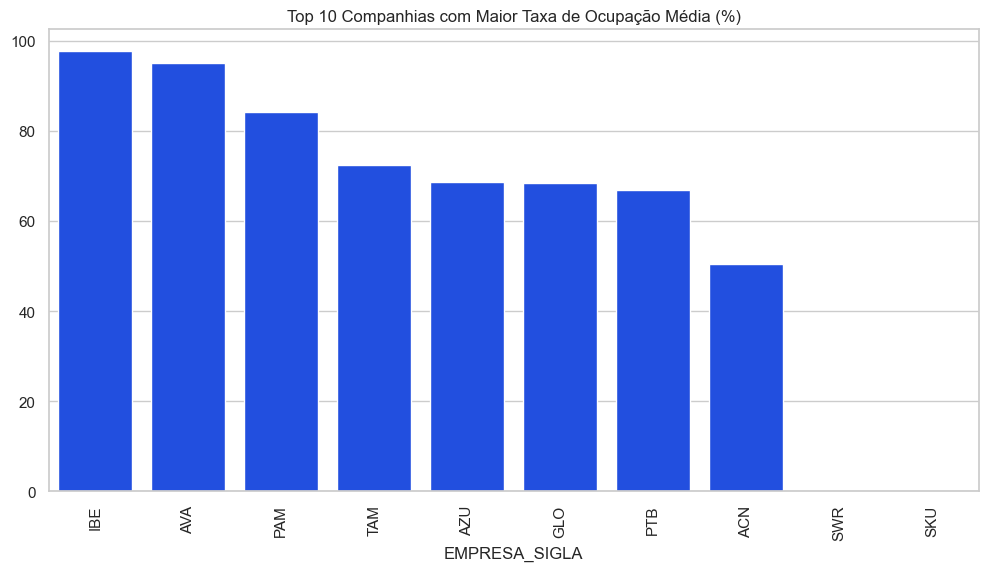

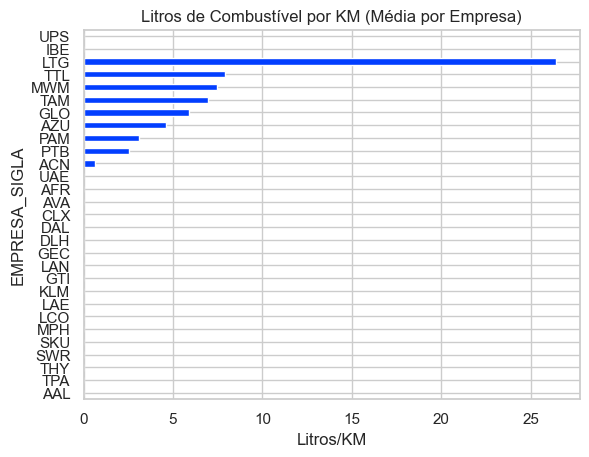

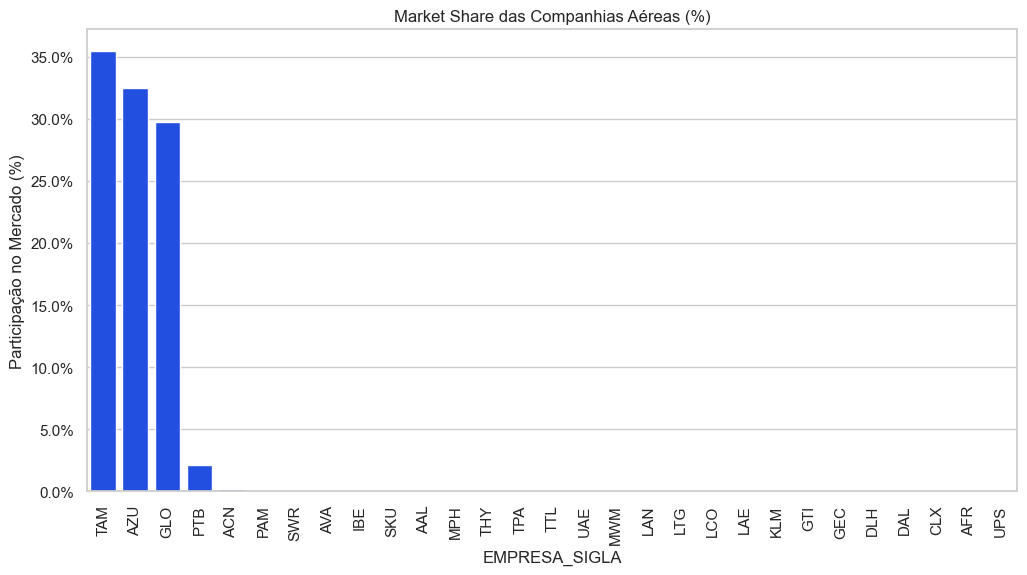

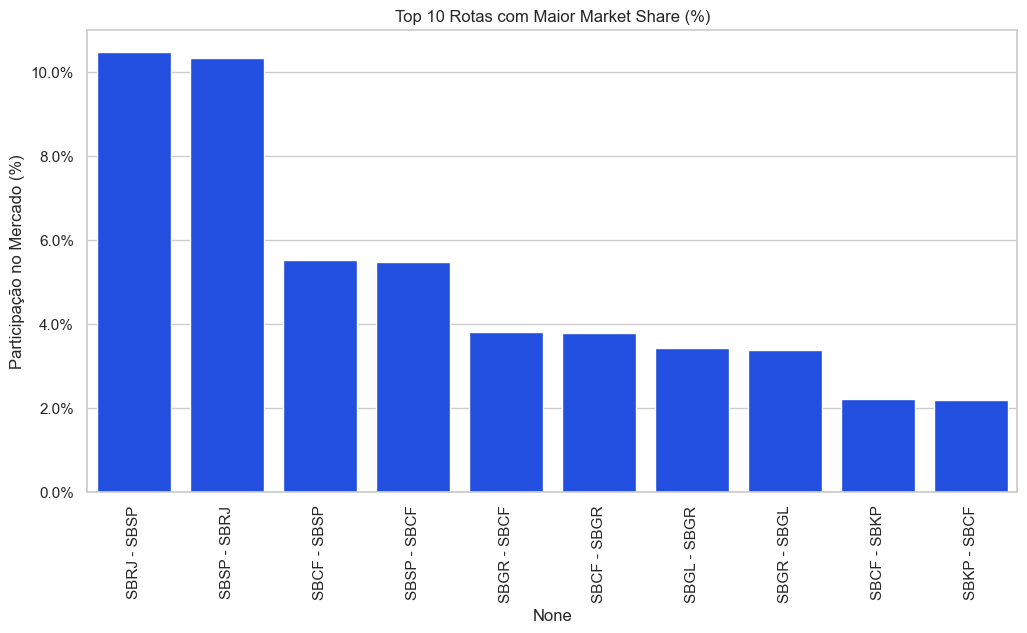

In [59]:
# 11. Visualização das métricas
plt.figure(figsize=(12, 6))
sns.barplot(x=taxa_ocupacao.index, y=taxa_ocupacao.values)
plt.xticks(rotation=90)
plt.title("Top 10 Companhias com Maior Taxa de Ocupação Média (%)")
plt.show()

eficiência_combustivel.plot(kind='barh', title='Litros de Combustível por KM (Média por Empresa)')
plt.xlabel('Litros/KM')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=market_share.index, y=market_share.values)
plt.xticks(rotation=90)
plt.title("Market Share das Companhias Aéreas (%)")
plt.ylabel("Participação no Mercado (%)")
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=market_share_rotas.index.map(lambda x: f"{x[0]} - {x[1]}"), y=market_share_rotas.values)
plt.xticks(rotation=90)
plt.title("Top 10 Rotas com Maior Market Share (%)")
plt.ylabel("Participação no Mercado (%)")
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.show()

## Top 10 Companhias Aéreas com maior Taxa de Ocupação Média

In [ ]:
## Taxa de Ocupação por Companhia (%)